<b><font face = 'Garamond' color = #A78A68 size=6.5> Wrangling </font> <font face = 'Garamond' size=6.5>and Analyzing Data</font>
<p><b><font face = 'Garamond' color = #A78A68 size=4.9>By:</font> <font face = 'Garamond' size=4.9> Ayobami Yusuf </font>
    
<img src="logo.jpg" width=100% height=70%/><p>

<b><font face = 'Optima' size=5 color=#A78A68>Introduction:</font>
> <font face = 'Lucida Bright' size=2.7>Real-world data rarely comes clean. In this project, using Python and its libraries, I gathered data from a variety of sources and in a variety of formats, assessed its quality and tidiness, then cleaned it. This is called <font face = "Garamond" size = 4 color=#A78A68> Data Wrangling.</font></font> <p>
<font face = 'Lucida Bright' size=2.7>The dataset used for my wrangling (and analyzing and visualizing) efforts is the tweet archive of Twitter user [@dog_rates](https://twitter.com/dog_rates), also known as [WeRateDogs](https://en.wikipedia.org/wiki/WeRateDogs). WeRateDogs is a Twitter account that rates people's dogs with a humorous comment about the dog. These ratings almost always have a denominator of 10. The numerators, though, almost always greater than 10. For example, you may find a rating of 11/10, 12/10, 13/10, etc. Why? Because "they're good dogs Brent." 😉😂 [read this blog post to make sense (maybe not so much sense) out of this](https://knowyourmeme.com/memes/theyre-good-dogs-brent#:~:text=They%27re%20Good%20Dogs%20Brent%20is%20a%20quote%20from,adorable%20poses%2C%20often%20giving%20them%20scores%20above%2010%2F10.)</font><p>
<font face = 'Lucida Bright' size=2.7>I had to access some needed but missing data by querying Twitter's API using the <font size=4.5>`tweepy`</font> library, and did a bit of web scrapping using Python's <font size=4.5>`requests`</font> library, this is in conjuction with other basic python libraries needed to complete the workflow (eg. numpy, pandas, matplotlib, seaborn etc.)</font><p>
> <font face = 'Lucida Bright' size=2.7>To make this notebook, hence, the work it contains easy to read, follow and understand, I have outlined my workflow in a series of phases, each split into a predefined <font size=4.5>`define`</font>, <font size=4.5>`code`</font>, and <font size=4.5>`test`</font> framework. Other information necessary to aid better understanding of what's going on have been provided as comments in each cell where code is written and executed. 

<b><font face = 'Optima' size=5 color=#A78A68>Importing all necessary libraries<font>


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import requests
import json
import tweepy

<b><font face = 'Optima' size=5 color=#A78A68>Data Gathering</font>
<b><p><font face = 'Optima' size=4 color=#A78A68>Main Task:</font>
> <font face = 'Optima' size=3>Here, I gather all the necessary datasets for this project. It includes manually downloading the <font size=4>`tweet_archive_enhanced.csv`</font> dataset and reading it into a dataframe within the notebook environment, using the <font size=4>`requests`</font> library to download the <font size=4>`image_prediction.tsv`</font> file and extracting its data into a dataframe within the notebook environment and finally accessing Twitter's API to scrape the missing <font size=4>`retweet_count`</font> and <font size=4>`favorite_count`,</font> and other data, storing it in a <font size=4.5>`tweet_json.txt`</font> file.</font>

1. The `tweet_archive_enhanced.csv` dataset has been manually downloaded into my local machine and uploaded into my notebook workspace. Here, I read it into a dataframe within the notebook environment

In [2]:
archive = pd.read_csv('twitter-archive-enhanced.csv')
archive.head(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None


2. Here, I use the `requests` library to download the tweet image prediction dataset (`image_predictions.tsv`)

In [3]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

#opening a tsv file and saving the response content
with open('image-predictions.tsv', mode='wb') as file:
    file.write(response.content)
    
#reading the tsv file into a dataframe
image = pd.read_csv('image-predictions.tsv', sep='\t')

#viewing first few rows 
image.head(3)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True


<font face = 'Tahoma' size=3> 3. Sadly, I experienced some hitches with getting my Twitter Developer accout approved (and on time) so I had ro resort to downloading the Json (<font size = 4>`tweet_json.txt`</font>) file provided by Udacity and read it into a dataframe, instead of accessing the data via Twitter's API.</font>
    
<img src="sad_dog.jpg" width=30% height=15%/>

In [4]:
#accessing the json file and reading it into a pandas dataframe
json_dict = []
with open('tweet_json.txt') as file:
    for line in file:
        tweet = (json.loads(line))
        tweet_id = tweet['id']
        retweet_count = tweet['retweet_count']
        favorite_count = tweet['favorite_count']
        create_date = tweet['created_at']
        json_dict.append({'retweet_count' : retweet_count,
                  'favorite_count' : favorite_count,
                  'create_date' : create_date,
                  'tweet_id' : tweet_id})
        
json_df = pd.DataFrame(json_dict, columns = ['tweet_id', 'retweet_count', 'favorite_count', 'create_date'])

In [5]:
#saving the extracted data to a csv file
json_df.to_csv('json_file.csv', index=False)

In [6]:
json = pd.read_csv('json_file.csv')
json.head()

,tweet_id,retweet_count,favorite_count,create_date
0,892420643555336193,8853,39467,Tue Aug 01 16:23:56 +0000 2017
1,892177421306343426,6514,33819,Tue Aug 01 00:17:27 +0000 2017
2,891815181378084864,4328,25461,Mon Jul 31 00:18:03 +0000 2017
3,891689557279858688,8964,42908,Sun Jul 30 15:58:51 +0000 2017
4,891327558926688256,9774,41048,Sat Jul 29 16:00:24 +0000 2017


<b><font face = 'Optima' size=5 color=#A78A68>Assessing Data</font><p>
<b><p><font face = 'Optima' size=4 color=#A78A68>Main Task:</font><p>
    
> <font face = 'Optima' size=3> In this section, I detect and document quality and tidiness issues with the datasets using both visual assessment and programmatic assessement to assess the data, then tidy the data up using python's libraries for data cleaning. <p> 
> I should point out, however, that for the purpose of this project:<p>
* I want to work only with original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate my skills in data wrangling. Therefore, my wrangling efforts will concentrate only on assessing and cleaning at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* I do not need to gather the tweets beyond August 1st, 2017. I could, but I won't be able to gather the image predictions for these tweets since I don't have access to the algorithm used. Hence, my analysis of the cleaned data may not be up-to-date with current trends.



<b><p><font face = 'Optima' size=4 color=#A78A68>Visual Assessment</font></b><p>

<font face = 'Tahoma' size=2>I display all three datasets and visually assess them for ***quality*** and ***tidiness*** issues</font><br>
<font face = 'Tahoma' size=2> I have three pandas dataframes set up within the notebook environment which i named <font size = 4>`archive`, `image` <font size = 2> and </font> `json`</font></font>

In [7]:
#displaying the archive dataframe
archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [8]:
#displaying the image dataframe
image

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [9]:
#displaing the json dataframe
json

,tweet_id,retweet_count,favorite_count,create_date
0,892420643555336193,8853,39467,Tue Aug 01 16:23:56 +0000 2017
1,892177421306343426,6514,33819,Tue Aug 01 00:17:27 +0000 2017
2,891815181378084864,4328,25461,Mon Jul 31 00:18:03 +0000 2017
3,891689557279858688,8964,42908,Sun Jul 30 15:58:51 +0000 2017
4,891327558926688256,9774,41048,Sat Jul 29 16:00:24 +0000 2017
5,891087950875897856,3261,20562,Sat Jul 29 00:08:17 +0000 2017
6,890971913173991426,2158,12041,Fri Jul 28 16:27:12 +0000 2017
7,890729181411237888,16716,56848,Fri Jul 28 00:22:40 +0000 2017
8,890609185150312448,4429,28226,Thu Jul 27 16:25:51 +0000 2017
9,890240255349198849,7711,32467,Wed Jul 26 15:59:51 +0000 2017


<b><p><font face = 'Optima' size=4 color=#A78A68>Programmatic Assessment</font></b><p>

<font face = 'Tahoma' size=2>Uisng python and its libraries, I assess the three dataframes for ***quality*** and ***tidiness*** issues by authoring useful codes and calling necessary functions and methods available within python via its libraries</font><p>
<font face = 'Tahoma' size=2> Recall, the three dataframes are: <font size = 4>`archive`, `image` <font size = 2> and </font> `json`</font></font><p>
    <b><p><font face = 'Optima' size=3>I <font color=#A78A68>assess</font> the <font face = 'Optima' size=4>`archive`</font> table first </font>

In [10]:
#viewing 10 random records in the archive dataframe
archive.sample(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
939,753039830821511168,NaN,NaN,2016-07-13 01:34:21 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",So this just changed my life. 13/10 please enj...,NaN,NaN,NaN,https://vine.co/v/5W2Dg3XPX7a,13,10,None,None,None,None,None
1303,707420581654872064,NaN,NaN,2016-03-09 04:19:44 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Keurig. He's a rare dog. Laughs like a...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/707420581...,4,10,Keurig,None,None,None,None
2007,672264251789176834,NaN,NaN,2015-12-03 04:01:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Kreg. He has the eyes of a tyrannical ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/672264251...,10,10,Kreg,None,None,None,None
910,757611664640446465,NaN,NaN,2016-07-25 16:21:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cooper. He tries to come across as fei...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/757611664...,12,10,Cooper,None,None,None,None
58,880935762899988482,NaN,NaN,2017-06-30 23:47:07 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Louis. He's crossing. It's a big deal....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/880935762...,13,10,Louis,None,None,None,None
276,840632337062862849,NaN,NaN,2017-03-11 18:35:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Maddie and Gunner. They are consi...,NaN,NaN,NaN,"https://www.gofundme.com/3hgsuu0,https://twitt...",12,10,Maddie,None,None,None,None
811,771171053431250945,NaN,NaN,2016-09-01 02:21:21 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Frankie. He's wearing b...,6.733201e+17,4.196984e+09,2015-12-06 01:56:44 +0000,https://twitter.com/dog_rates/status/673320132...,11,10,Frankie,None,None,None,None
439,819952236453363712,NaN,NaN,2017-01-13 17:00:21 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Oliver. He has dreams of being a servi...,NaN,NaN,NaN,"https://www.gofundme.com/servicedogoliver,http...",13,10,Oliver,None,None,None,puppo
2184,668988183816871936,NaN,NaN,2015-11-24 03:03:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Honor to rate this dog. Lots of fur on him. Tw...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/668988183...,7,10,None,None,None,None,None
1319,706516534877929472,NaN,NaN,2016-03-06 16:27:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Please enjoy this pup in a cooler. Permanently...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/706516534...,12,10,None,None,None,None,None


In [11]:
#displaying an overview of the archive dataframe
archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [12]:
#viewing summary statistics of the features in the archive table
archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [13]:
#capturing missing records and how many records are missing in each feature in the archive dataframe
#also, I check for duplicate records
print(archive.isnull().sum())
print(archive.duplicated().sum())

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64
0


In [14]:
#noticed some dog names are 'None' and the .info() method returns no null entries for the name column
#my guess is that some dogs have been named wrongly
#or dogs whose names are missing have been named 'none'
archive.name

0        Phineas
1          Tilly
2         Archie
3          Darla
4       Franklin
5           None
6            Jax
7           None
8           Zoey
9         Cassie
10          Koda
11         Bruno
12          None
13           Ted
14        Stuart
15        Oliver
16           Jim
17          Zeke
18       Ralphus
19        Canela
20        Gerald
21       Jeffrey
22          such
23        Canela
24          None
25          None
26          Maya
27        Mingus
28         Derek
29        Roscoe
          ...   
2326       quite
2327           a
2328        None
2329        None
2330        None
2331        None
2332        None
2333          an
2334           a
2335          an
2336        None
2337        None
2338        None
2339        None
2340        None
2341        None
2342        None
2343        None
2344        None
2345         the
2346         the
2347           a
2348           a
2349          an
2350           a
2351        None
2352           a
2353          

In [15]:
#from the result of the describe function, i noticed some anomalies with the rating_numerator
#and rating_denominator columns, it contained some outrageous values.
#I should check those columns out and see what's going on

print(archive.rating_numerator.value_counts())
print(archive.rating_denominator.value_counts())

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64
10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64


<b><p><font face = 'Optima' size=3>I <font color=#A78A68>asses</font> the <font face = 'Optima' size=4>`image`</font> table next </font>

In [16]:
#checking random records of the image dataframe
image.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1611,801285448605831168,https://pbs.twimg.com/media/Cx683NPUAAAjyU4.jpg,1,minivan,0.789376,False,beach_wagon,0.081125,False,convertible,0.064534,False
1356,760539183865880579,https://pbs.twimg.com/media/Co36VZfWcAEN3R3.jpg,1,Samoyed,0.988013,True,malamute,0.004518,True,West_Highland_white_terrier,0.001189,True
1642,807621403335917568,https://pbs.twimg.com/media/CzU_YVGUUAA3Xsd.jpg,3,golden_retriever,0.873233,True,cocker_spaniel,0.033693,True,chow,0.020408,True
1178,737826014890496000,https://pbs.twimg.com/media/Cj1I1fbWYAAOwff.jpg,1,vizsla,0.990391,True,Rhodesian_ridgeback,0.005605,True,Chesapeake_Bay_retriever,0.002869,True
487,675501075957489664,https://pbs.twimg.com/media/CV_cnjHWUAADc-c.jpg,1,dough,0.806757,False,bakery,0.027907,False,French_loaf,0.018189,False
1756,825026590719483904,https://pbs.twimg.com/media/C3MVTeHWcAAGNfx.jpg,2,Eskimo_dog,0.524454,True,Siberian_husky,0.467678,True,malamute,0.004976,True
847,695409464418041856,https://pbs.twimg.com/media/CaaXN5LUYAEzAh-.jpg,1,pug,0.997445,True,bull_mastiff,0.001749,True,Pekinese,0.000304,True
699,684594889858887680,https://pbs.twimg.com/media/CYAra7JWsAACPZH.jpg,1,Weimaraner,0.948688,True,English_setter,0.035352,True,Brittany_spaniel,0.003879,True
627,680836378243002368,https://pbs.twimg.com/media/CXLREjOW8AElfk6.jpg,3,Pembroke,0.427781,True,Shetland_sheepdog,0.160669,True,Pomeranian,0.111250,True
1285,750719632563142656,https://pbs.twimg.com/media/CmsXg9AWgAAs6Ui.jpg,1,Pembroke,0.972587,True,Cardigan,0.014772,True,basenji,0.005798,True


In [17]:
#overview of the image table and its columns
image.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [18]:
#summary statistics of the numeriacl fields in the image table
image.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [19]:
#checking for duplicated data since it appears no data is missing
image.duplicated().sum()

0

<b><p><font face = 'Optima' size=3>Lastly, I <font color=#A78A68>asses</font> the <font face = 'Optima' size=4>`json`</font> table</font>

In [20]:
#as usual, I check for random entries in the table for a quick peek
json.sample(10)

,tweet_id,retweet_count,favorite_count,create_date
643,793180763617361921,2310,7740,Mon Oct 31 20:00:05 +0000 2016
813,771014301343748096,1782,7032,Wed Aug 31 15:58:28 +0000 2016
1598,686007916130873345,472,2704,Sun Jan 10 02:13:27 +0000 2016
1065,740676976021798912,7724,19881,Wed Jun 08 22:48:46 +0000 2016
2076,670832455012716544,242,780,Sun Nov 29 05:11:35 +0000 2015
406,823699002998870016,2772,13826,Tue Jan 24 01:08:40 +0000 2017
818,770414278348247044,2390,6987,Tue Aug 30 00:14:12 +0000 2016
650,792773781206999040,1963,8209,Sun Oct 30 17:02:53 +0000 2016
2089,670783437142401025,431,872,Sun Nov 29 01:56:48 +0000 2015
1559,688385280030670848,5035,10180,Sat Jan 16 15:40:14 +0000 2016


In [21]:
#viewing general info
json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 4 columns):
tweet_id          2354 non-null int64
retweet_count     2354 non-null int64
favorite_count    2354 non-null int64
create_date       2354 non-null object
dtypes: int64(3), object(1)
memory usage: 73.6+ KB


In [22]:
#no null data present
#so, I check for duplicates
json.duplicated().sum()

0

<b><p><font face = 'Optima' size=4 color=#A78A68>Quality issues</font></b>

#### `archive` table

1. The table also contains (irrelevant) data about retweets and replies (recall that I'm working with only original tweets)
2. The 'expanded_url' column contains missing data
3. The 'timestap' has a wrong data type of object. It should be in datetime
4. The 'tweet_id' column also has a wrong data type. It should be an object type instead of integer
5. Invalid (outrageous) 'rating_numerator' and 'rating_denominator' values
6. Some Dog names have been invalidly entered as "None", "a", "an", "such", "the", "quite" etc. (Can't clean - actual names not easily accessible, and shouldn't be dropped due to their large number)

#### `image` table
7. Column names not descriptive (eg. p1, p1_conf, p1_dog, p2, p2_conf, p2_dog, p3, p3_conf, p3_dog)
8. p1, p2, and p3 columns have their values entered in inconsistent formats (lower and proper cases in the same columns)
9. The 'tweet_id' column has a wrong data type (integer instead object, for the sake of consistency)

#### `json` table
10.  The 'tweet_id' column has a wrong data type (integer instead object, for the sake of consistency across tables)


<b><p><font face = 'Optima' size=4 color=#A78A68>Tidiness issues</font></b><p>
1. Four columns in `archive` table (doggo, floofer, pupper, puppo) are one variable (dog_stage) and should be unpivoted
2. All three tables should be merged into one table using common column (tweet_id) as key

<b><font face = 'Optima' size=5 color=#A78A68>Cleaning Data</font></b><p>
<b><p><font face = 'Optima' size=4 color=#A78A68>Main Task:</font><p>
    
> <font face = 'Optima' size=3> In this section, I clean all of the issues documented while assessing. 
I start by making a copy of the original data before cleaning. I hope that after my cleaning efforts, the cleaned data conforms to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html).</font>

In [23]:
#making copies of original pieces of data
archive_clean = archive.copy()
image_clean = image.copy()
json_clean = json.copy()
print('all datasets successfully copied')

all datasets successfully copied


## Issue #1

#### Define:
**Remove data about retweets and replies from the `archive` table - since I'm working with only original tweets**

#### Code:

In [24]:
#subset the dataframe for empty rows in the irrelevant columns
archive_clean = archive_clean[archive_clean['in_reply_to_status_id'].isnull()] 
archive_clean = archive_clean[archive_clean['retweeted_status_id'].isnull()] 

#drop irrelevant columns
drop_cols = ["in_reply_to_status_id", "in_reply_to_user_id", "retweeted_status_id", "retweeted_status_user_id", "retweeted_status_timestamp" ]

#drop them
archive_clean.drop(drop_cols, axis = 1, inplace=True)

#### Test:

In [25]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2097 non-null int64
timestamp             2097 non-null object
source                2097 non-null object
text                  2097 non-null object
expanded_urls         2094 non-null object
rating_numerator      2097 non-null int64
rating_denominator    2097 non-null int64
name                  2097 non-null object
doggo                 2097 non-null object
floofer               2097 non-null object
pupper                2097 non-null object
puppo                 2097 non-null object
dtypes: int64(3), object(9)
memory usage: 213.0+ KB


## Issue #2

#### Define:
**Drop missing rows from the expanded_urls column**

In [26]:
archive_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


#### Code:

In [27]:
archive_clean['expanded_urls'].dropna(how = "all", inplace=True)

#### Test:

In [28]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2097 non-null int64
timestamp             2097 non-null object
source                2097 non-null object
text                  2097 non-null object
expanded_urls         2094 non-null object
rating_numerator      2097 non-null int64
rating_denominator    2097 non-null int64
name                  2097 non-null object
doggo                 2097 non-null object
floofer               2097 non-null object
pupper                2097 non-null object
puppo                 2097 non-null object
dtypes: int64(3), object(9)
memory usage: 213.0+ KB


## Issue #3

#### Define:
Convert the *timestamp* column in the `archive_clean` dataframe from **object** to **datetime**

#### Code:

In [29]:
archive_clean['timestamp'] = pd.to_datetime(archive_clean['timestamp'])

#### Test:

In [30]:
archive_clean.dtypes

tweet_id                       int64
timestamp             datetime64[ns]
source                        object
text                          object
expanded_urls                 object
rating_numerator               int64
rating_denominator             int64
name                          object
doggo                         object
floofer                       object
pupper                        object
puppo                         object
dtype: object

## Issue #4, #9 & #10

#### Define:
Change the **tweet_id** columns in all three tables from *int64* datatype to *object* datatype

#### Code:

In [31]:
#from the archive_clean table
archive_clean['tweet_id'] = archive_clean['tweet_id'].astype(str)

#from the image_clean table
image_clean['tweet_id'] = image_clean['tweet_id'].astype(str)

#from the json_clean table
json_clean['tweet_id'] = json_clean['tweet_id'].astype(str)

#### Test:

In [32]:
#inspect the data types of the columns 
print(archive_clean.info())
print(image_clean.info())
print(json_clean.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2097 non-null object
timestamp             2097 non-null datetime64[ns]
source                2097 non-null object
text                  2097 non-null object
expanded_urls         2094 non-null object
rating_numerator      2097 non-null int64
rating_denominator    2097 non-null int64
name                  2097 non-null object
doggo                 2097 non-null object
floofer               2097 non-null object
pupper                2097 non-null object
puppo                 2097 non-null object
dtypes: datetime64[ns](1), int64(2), object(9)
memory usage: 213.0+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null object
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-nu

## Issue #5

#### Define:

**Dropping rows with outrageous values in the rating_numerator and rating_denominator columns of the `archive` table**

> From the documentation, any rating that has a numerator higher than 15 is most likely an invalid and pun intended rating. For flexibility, I relax the range to span between 1 and 20

#### Code:

In [33]:
#subset the archive table to contain only records where rating_numerator is between 1 and 20
archive_clean = archive_clean[(archive_clean.rating_numerator < 20) & (archive_clean.rating_numerator > 1)]

#also subset the archive table to contain only records where rating_denominator is between 1 and 20
archive_clean = archive_clean[(archive_clean.rating_denominator < 20) & (archive_clean.rating_denominator > 1)]

#### Test:

In [34]:
print(archive_clean.rating_numerator.value_counts())
print(archive_clean.rating_denominator.value_counts())
print(archive_clean.rating_numerator.shape)
print(archive_clean.rating_numerator.shape)

12    486
10    436
11    413
13    287
9     153
8      98
7      52
14     38
5      34
6      32
3      19
4      15
2       9
Name: rating_numerator, dtype: int64
10    2070
11       2
Name: rating_denominator, dtype: int64
(2072,)
(2072,)


### Issue #6

#### Define
Deal with invalid dog names in the `archive_clean` table (which are most likely missing entries represented by a random word, but this claim is unconfirmed). Due to their large number, I won't drop them. Rather, I'll replace every instance of an invalid name with "None". 

💡A useful hint is that all such names begin with a lower case character. So, I can track them using this property

#### Code

In [35]:
# Create a container for all invalid names
invalid_names = []

#iterate over every invalid name in the archive table and append them to the empty container created
for each_item in archive_clean.name:
    if each_item.islower() and each_item not in invalid_names:
        invalid_names.append(each_item)
    
#eplace the invalid names with 'None' to add them to the already existing invalid entries named 'None'
archive_clean.name.replace(invalid_names, 'None', inplace=True)

#### Test

In [36]:
#display all items in the name column
archive_clean.name.value_counts()

None         687
Lucy          11
Charlie       11
Cooper        10
Oliver        10
Tucker         9
Penny          9
Winston        8
Lola           8
Sadie          8
Daisy          7
Toby           7
Oscar          6
Bo             6
Bella          6
Koda           6
Jax            6
Stanley        6
Bailey         6
Dave           5
Milo           5
Bentley        5
Leo            5
Louis          5
Chester        5
Buddy          5
Scout          5
Rusty          5
Larry          4
Jeffrey        4
            ... 
Anakin         1
Hubertson      1
Meera          1
Kane           1
Chloe          1
Sully          1
Pupcasso       1
Alexander      1
Kawhi          1
Jett           1
Rontu          1
Butters        1
Gilbert        1
Pablo          1
Swagger        1
Ashleigh       1
Tilly          1
Ralphé         1
Grey           1
Corey          1
Deacon         1
Klein          1
Trigger        1
Sailor         1
Dwight         1
Tanner         1
Suki           1
Banditt       

### Issues #7

#### Define:
**Rename non-descriptive columns (eg. p1, p1_conf, p1_dog, p2, p2_conf, p2_dog, p3, p3_conf, p3_dog) to something more assessible to non-technical minds**

#### Code:

In [37]:
image_clean.rename(columns={'p1':'#1_prediction', 'p1_conf': '#1_prediction_confidence_level', 'p1_dog': '#1_dog_breed_or_not',
                                  'p2': '#2_prediction', 'p2_conf': '#2_prediction_confidence_level', 'p2_dog': '#2_dog_breed_or_not',
                                  'p3': '#3_prediction', 'p3_conf': '#3_prediction_confidence_level', 'p3_dog': '#3_dog_breed_or_not'}, inplace = True)

#### Test:

In [38]:
image_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id                          2075 non-null object
jpg_url                           2075 non-null object
img_num                           2075 non-null int64
#1_prediction                     2075 non-null object
#1_prediction_confidence_level    2075 non-null float64
#1_dog_breed_or_not               2075 non-null bool
#2_prediction                     2075 non-null object
#2_prediction_confidence_level    2075 non-null float64
#2_dog_breed_or_not               2075 non-null bool
#3_prediction                     2075 non-null object
#3_prediction_confidence_level    2075 non-null float64
#3_dog_breed_or_not               2075 non-null bool
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


## Issue #8

#### Define:

**Change how p1, p2, and p3 columns have their values entered in inconsistent formats (lower and proper cases in the same columns)**

**Change all rows to the same format**

#### Code:

In [39]:
# Change the p1, p2, and p3 values all to proper case since they are nouns.
image_clean['#1_prediction'] = image_clean['#1_prediction'].str.title()
image_clean['#2_prediction'] = image_clean['#2_prediction'].str.title()
image_clean['#3_prediction'] = image_clean['#3_prediction'].str.title()

#### Test:

In [40]:
image_clean.sample(10)

,tweet_id,jpg_url,img_num,#1_prediction,#1_prediction_confidence_level,#1_dog_breed_or_not,#2_prediction,#2_prediction_confidence_level,#2_dog_breed_or_not,#3_prediction,#3_prediction_confidence_level,#3_dog_breed_or_not
344,672267570918129665,https://pbs.twimg.com/media/CVRfyZxWUAAFIQR.jpg,1,Irish_Terrier,0.716932,True,Miniature_Pinscher,0.051234,True,Airedale,0.044381,True
118,668154635664932864,https://pbs.twimg.com/media/CUXDGR2WcAAUQKz.jpg,1,Arctic_Fox,0.473584,False,Wallaby,0.261411,False,White_Wolf,0.080948,False
870,697881462549430272,https://pbs.twimg.com/media/Ca9feqDUAAA_z7T.jpg,1,Washbasin,0.176423,False,Paper_Towel,0.167462,False,Toilet_Tissue,0.098029,False
1227,745314880350101504,https://pbs.twimg.com/media/Clfj6RYWMAAFAOW.jpg,2,Ice_Bear,0.807762,False,Great_White_Shark,0.027040,False,Fountain,0.022052,False
935,703407252292673536,https://pbs.twimg.com/media/CcMBJODUsAI5-A9.jpg,1,Doormat,0.201058,False,Turnstile,0.088583,False,Carton,0.082924,False
770,689289219123089408,https://pbs.twimg.com/ext_tw_video_thumb/68928...,1,Snowmobile,0.254642,False,Assault_Rifle,0.129558,False,Rifle,0.110875,False
617,680206703334408192,https://pbs.twimg.com/media/CXCUYcRW8AAObYM.jpg,1,Christmas_Stocking,0.149758,False,Cloak,0.128830,False,Teddy,0.109129,False
818,692901601640583168,https://pbs.twimg.com/media/CZ2uU37UcAANzmK.jpg,1,Soft-Coated_Wheaten_Terrier,0.403496,True,Cocker_Spaniel,0.135164,True,Golden_Retriever,0.088719,True
1078,717790033953034240,https://pbs.twimg.com/media/CfYaOeMWQAAGfyP.jpg,1,Car_Mirror,0.819106,False,Minibus,0.107383,False,Cab,0.034846,False
1137,728986383096946689,https://pbs.twimg.com/media/Ch3hOGWUYAE7w0y.jpg,2,Maltese_Dog,0.952070,True,Toy_Poodle,0.027271,True,Miniature_Poodle,0.004874,True


## Tidiness Issue #1

#### Define:
**Flatten the four wide columns in `archive` table (doggo, floofer, pupper, puppo) which consists of just one variable (dog_stage) and should be unpivoted**

#### Code:

In [41]:
#first, I replace all the rows with 'None' with an empty value
dog_stages = ['doggo','pupper', 'floofer', 'puppo' ]
for dog_stage in dog_stages:
        archive_clean[dog_stage] = archive_clean[dog_stage].replace('None', '')
        
#now, I can call the .cat() method to combine the columns as one variable
archive_clean['stage'] = archive_clean.doggo.str.cat(archive_clean.floofer).str.cat(archive_clean.pupper).str.cat(archive_clean.puppo)

#next. I drop the initial four columns
archive_clean = archive_clean.drop(['doggo','floofer','pupper','puppo'], axis = 1)

#Then I fill empty rows with NaN value
archive_clean['stage'] = archive_clean['stage'].replace('', np.nan)

#### Test:

In [42]:
archive_clean.sample(10)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage
2314,666701168228331520,2015-11-17 19:35:19,"<a href=""http://twitter.com/download/iphone"" r...",This is a golden Buckminsterfullerene named Jo...,https://twitter.com/dog_rates/status/666701168...,8,10,None,NaN
1451,695794761660297217,2016-02-06 02:22:53,"<a href=""http://twitter.com/download/iphone"" r...",This is Wyatt. His throne is modeled after him...,https://twitter.com/dog_rates/status/695794761...,13,10,Wyatt,NaN
122,869227993411051520,2017-05-29 16:24:37,"<a href=""http://twitter.com/download/iphone"" r...",This is Gizmo. His favorite thing is standing ...,https://twitter.com/dog_rates/status/869227993...,13,10,Gizmo,NaN
968,750147208377409536,2016-07-05 02:00:06,"<a href=""http://twitter.com/download/iphone"" r...","And finally, happy 4th of July from the squad ...",https://twitter.com/dog_rates/status/750147208...,13,10,None,NaN
2300,667062181243039745,2015-11-18 19:29:52,"<a href=""http://twitter.com/download/iphone"" r...",This is Keet. He is a Floridian Amukamara. Abs...,https://twitter.com/dog_rates/status/667062181...,10,10,Keet,NaN
1384,700796979434098688,2016-02-19 21:39:54,"<a href=""http://twitter.com/download/iphone"" r...",This is Daniel. He's a neat pup. Exotic af. Cu...,https://twitter.com/dog_rates/status/700796979...,7,10,Daniel,NaN
1512,691321916024623104,2016-01-24 18:09:23,"<a href=""http://twitter.com/download/iphone"" r...",This is Molly. She's a Peruvian Niddlewog. Lov...,https://twitter.com/dog_rates/status/691321916...,11,10,Molly,NaN
403,824297048279236611,2017-01-25 16:45:05,"<a href=""http://twitter.com/download/iphone"" r...",This is Nala. She got in trouble. One h*ck of ...,https://twitter.com/dog_rates/status/824297048...,11,10,Nala,NaN
1522,690649993829576704,2016-01-22 21:39:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Hazel. She's a gymnast. Training hard ...,https://twitter.com/dog_rates/status/690649993...,11,10,Hazel,NaN
354,831262627380748289,2017-02-13 22:03:49,"<a href=""http://twitter.com/download/iphone"" r...",This is Tucker. He's feeling h*ckin festive an...,https://twitter.com/dog_rates/status/831262627...,12,10,Tucker,NaN


## Tidiness Issue #2

#### Define:

**Merge all three dataset into a master dataset on the common column (tweet_id)**

#### Code:

In [43]:
merged_df = pd.merge(archive_clean, image_clean, on='tweet_id', how='inner').merge(json_clean, on='tweet_id', how='inner' )

#### Test:

In [44]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1946 entries, 0 to 1945
Data columns (total 23 columns):
tweet_id                          1946 non-null object
timestamp                         1946 non-null datetime64[ns]
source                            1946 non-null object
text                              1946 non-null object
expanded_urls                     1946 non-null object
rating_numerator                  1946 non-null int64
rating_denominator                1946 non-null int64
name                              1946 non-null object
stage                             302 non-null object
jpg_url                           1946 non-null object
img_num                           1946 non-null int64
#1_prediction                     1946 non-null object
#1_prediction_confidence_level    1946 non-null float64
#1_dog_breed_or_not               1946 non-null bool
#2_prediction                     1946 non-null object
#2_prediction_confidence_level    1946 non-null float64
#2_dog_br

<b><font face = 'Optima' size=5 color=#A78A68>Storing Data</font><p>
    
<b><p><font face = 'Optima' size=4 color=#A78A68>Main Task:</font><p>
> <font face = 'Optima' size=3> Here, I save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".</font>

In [45]:
merged_df.to_csv("twitter_archive_master.csv", index=False)

#### Test:

In [46]:
master_df = pd.read_csv('twitter_archive_master.csv')
master_df.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage,jpg_url,...,#1_dog_breed_or_not,#2_prediction,#2_prediction_confidence_level,#2_dog_breed_or_not,#3_prediction,#3_prediction_confidence_level,#3_dog_breed_or_not,retweet_count,favorite_count,create_date
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,...,False,Bagel,0.085851,False,Banana,0.076110,False,8853,39467,Tue Aug 01 16:23:56 +0000 2017
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,...,True,Pekinese,0.090647,True,Papillon,0.068957,True,6514,33819,Tue Aug 01 00:17:27 +0000 2017
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,...,True,Malamute,0.078253,True,Kelpie,0.031379,True,4328,25461,Mon Jul 31 00:18:03 +0000 2017
3,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,...,False,Labrador_Retriever,0.168086,True,Spatula,0.040836,False,8964,42908,Sun Jul 30 15:58:51 +0000 2017
4,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,...,True,English_Springer,0.225770,True,German_Short-Haired_Pointer,0.175219,True,9774,41048,Sat Jul 29 16:00:24 +0000 2017


<b><font face = 'Optima' size=5 color=#A78A68>Analyzing and Visualizing Data</font><p>
    
<b><p><font face = 'Optima' size=4 color=#A78A68>Main Task:</font><p>
    
> <font face = 'Optima' size=3> In this section, I analyze and visualize the wrangled data. Let's deep-dive into the data to uncover some insights.</font>

### How popular are the different dog stages tweeted about?

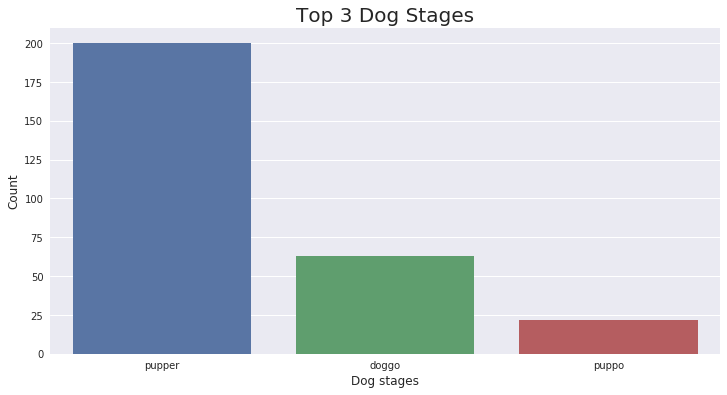

In [47]:
plt.figure(figsize = (12,6))
sns.set(style = 'darkgrid')
sorted_dog_stages = merged_df['stage'].value_counts().head(3).index
sns.countplot(data = merged_df, x ='stage', order = sorted_dog_stages, orient='v')
plt.xlabel('Dog stages', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Top 3 Dog Stages', fontsize=20);

### Top 10 Dog Breeds by First Predictions

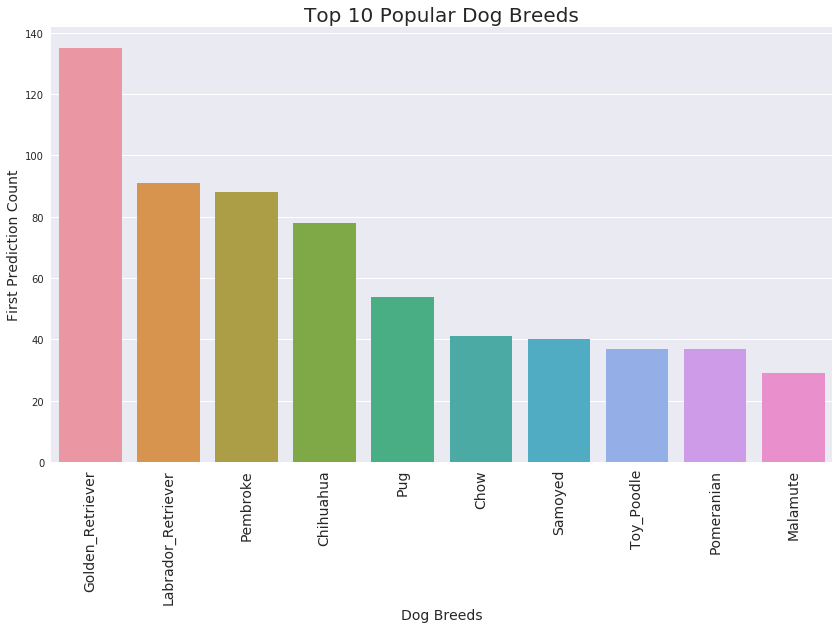

In [51]:
plt.figure(figsize = (14,8))
plot = sns.barplot(x = merged_df['#1_prediction'].value_counts()[0:10].index,
            y = merged_df['#1_prediction'].value_counts()[0:10],
            data = merged_df);
plot.set_xticklabels(plot.get_xticklabels(),rotation = 90, fontsize = 14);
plt.xlabel("Dog Breeds",fontsize = 14);
plt.ylabel("First Prediction Count",fontsize = 14);
plt.title("Top 10 Popular Dog Breeds",fontsize = 20);

### Are there any sort of correlation between any pair of variables in the dataframe?

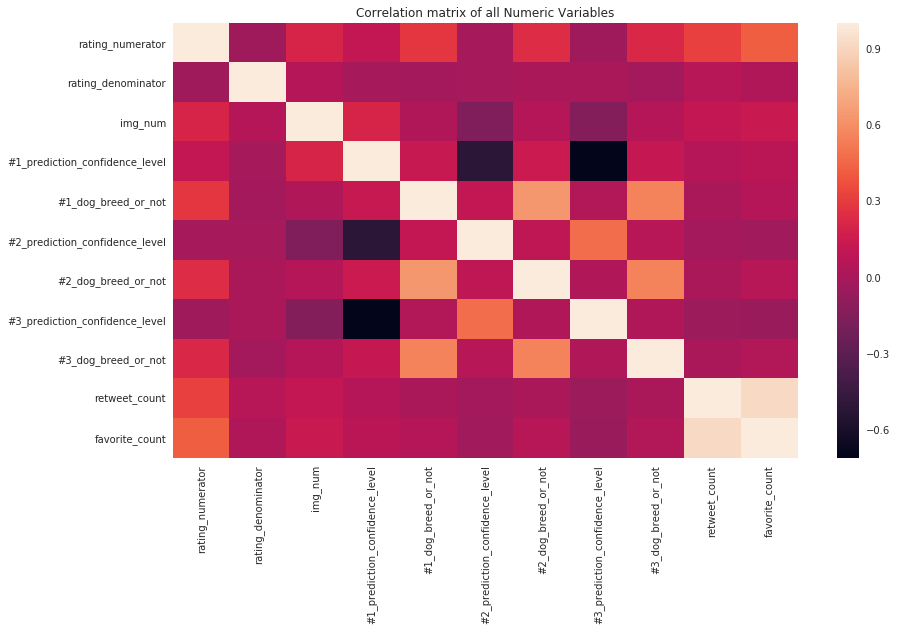

In [49]:
#Plotting a heatmap to reveal any correlation that may exist between variables in the dataframe
plot = plt.figure(figsize=(14,8)) 
sns.set_style('darkgrid')

correlations = merged_df.corr()
sns.heatmap(correlations, 
            xticklabels=correlations.columns.values,
            yticklabels=correlations.columns.values);
plt.title('Correlation matrix of all Numeric Variables');

> ***Interestingly, only retweet_count and favorite_count seem to be highly positively correlated. Zooming in on that:***

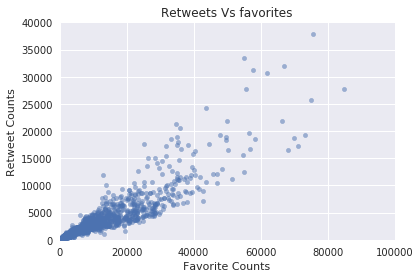

In [50]:
#plotting a scatter plot for favorite_count and retweet_count
sns.set_style('darkgrid')
plt.figure(figsize=(16,10))
merged_df.plot(kind = 'scatter', x = 'favorite_count', y = 'retweet_count', alpha = 0.5)
plt.xlim((0,100000))
plt.ylim((0,40000))
plt.xlabel('Favorite Counts')
plt.ylabel('Retweet Counts')
plt.title('Retweets Vs favorites');

<b><font face = 'Optima' size=5 color=#A78A68>Insights:</font><p></b>

<font face = 'Optima' size=3 color=#A78A68>
    
1. It appears that WeRateDogs followers are more likely to retweet dog ratings' posts that they click the favorite button on, as a strong positive correlation exists between retweet_count and favorite_count.<p>

2. Dogs at the 'pupper' stage are the most featured on WeRateDogs Twitter ratings posts. So, one is likely to get more engagements posting puppers, more than dogs at other stages <p>

3. Apparently, that a dog has a higher rating does not guarantee higher posts engagements as rating has low correlation with both retweet_count and favorite_count <p>

4. The Golden Retriever is the most popular dog breed, followed by Labrador Retriever and Pembroke in Top 3
</font><p>